In [2]:
import pandas as pd
from lightgbm import LGBMClassifier

In [3]:
ml_df = pd.read_csv('IPS_payload_200000_sql_result_df_result.csv')
ml_df.columns

Index(['label', 'ips_00013_payload_length_value',
       'ips_00014_payload_logscaled_length_value',
       'ips_00015_payload_sys_manager_flag',
       'ips_00016_payload_sys_console_flag',
       'ips_00017_payload_sys_admin_flag', 'ips_00018_payload_sys_setup_flag',
       'ips_00019_payload_sys_config_flag',
       'ips_00020_payload_sys_server_flag',
       'ips_00021_payload_char_single_quotation_cnt',
       'ips_00022_payload_char_double_quotation_cnt',
       'ips_00023_payload_char_equal_cnt', 'ips_00024_payload_char_plus_cnt',
       'ips_00025_payload_char_star_cnt', 'ips_00026_payload_char_slush_cnt',
       'ips_00027_payload_char_lt_cnt', 'ips_00028_payload_char_at_cnt',
       'ips_00029_payload_char_parent_cnt',
       'ips_00030_payload_char_bracket_cnt',
       'ips_00031_payload_char_dollar_cnt',
       'ips_00032_payload_char_double_dot_cnt',
       'ips_00033_payload_sql_and_flag', 'ips_00034_payload_sql_or_flag',
       'ips_00035_payload_sql_select_flag', 'ips_0

In [4]:
ml_df.head()

,label,ips_00013_payload_length_value,ips_00014_payload_logscaled_length_value,ips_00015_payload_sys_manager_flag,ips_00016_payload_sys_console_flag,ips_00017_payload_sys_admin_flag,ips_00018_payload_sys_setup_flag,ips_00019_payload_sys_config_flag,ips_00020_payload_sys_server_flag,ips_00021_payload_char_single_quotation_cnt,...,ips_00050_payload_cmd_config_flag,ips_00051_payload_cmd_ls_flag,ips_00052_payload_cmd_mkdir_flag,ips_00053_payload_cmd_netstat_flag,ips_00054_payload_cmd_ftp_flag,ips_00055_payload_cmd_cat_flag,ips_00056_payload_cmd_dir_flag,ips_00057_payload_cmd_wget_flag,ips_00058_payload_cmd_echo_flag,ips_00059_payload_cmd_rm_flag
0,O,391,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,O,758,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,X,411,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,O,43,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,O,58,4,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
ml_df.dtypes

label                                          object
ips_00013_payload_length_value                  int64
ips_00014_payload_logscaled_length_value        int64
ips_00015_payload_sys_manager_flag              int64
ips_00016_payload_sys_console_flag              int64
ips_00017_payload_sys_admin_flag                int64
ips_00018_payload_sys_setup_flag                int64
ips_00019_payload_sys_config_flag               int64
ips_00020_payload_sys_server_flag               int64
ips_00021_payload_char_single_quotation_cnt     int64
ips_00022_payload_char_double_quotation_cnt     int64
ips_00023_payload_char_equal_cnt                int64
ips_00024_payload_char_plus_cnt                 int64
ips_00025_payload_char_star_cnt                 int64
ips_00026_payload_char_slush_cnt                int64
ips_00027_payload_char_lt_cnt                   int64
ips_00028_payload_char_at_cnt                   int64
ips_00029_payload_char_parent_cnt               int64
ips_00030_payload_char_brack

LightGBM

In [6]:
lgb_clf = LGBMClassifier(random_state=127127)

In [7]:
lgb_clf.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 127127,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [8]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(ml_df, test_size= 0.2,
                                    stratify=ml_df['label'], random_state= 7171)

In [9]:
X_train = train_df.iloc[:, 1:]
y_train = train_df['label']

X_test = test_df.iloc[:, 1:]
y_test = test_df['label']

In [10]:
lgb_clf.fit(X_train, y_train)

LGBMClassifier(random_state=127127)

LightGBM 모델 저장

In [11]:
pwd

'/Users/choiwb/Python_projects/이글루시큐리티_DSS_표준모델_Web_API/DSS_IPS_flask_server'

In [12]:
import pickle
import os
saved_model_path = '/Users/choiwb/Python_projects/이글루시큐리티_DSS_표준모델_Web_API/DSS_IPS_flask_server/saved_model'

# pickle.dump(lgb_clf, open(os.path.join(saved_model_path, 'DSS_IPS_LightGBM.pkl'), 'wb'))

LightGBM 모델 성능 측정

In [13]:
y_pred = lgb_clf.predict(X_test)

# LGB_AI: 예측 라벨
test_df['LGB_AI'] = y_pred
test_df['LGB_AI'].value_counts()

O    30096
X     9904
Name: LGB_AI, dtype: int64

In [14]:
y_pred_proba = lgb_clf.predict_proba(X_test)
y_pred_proba

array([[0.00906838, 0.99093162],
       [0.9963582 , 0.0036418 ],
       [0.99313496, 0.00686504],
       ...,
       [0.99602204, 0.00397796],
       [0.99602204, 0.00397796],
       [0.88303497, 0.11696503]])

In [15]:
# LGB_AI_proba: 예측 라벨 별, 확률
test_df['LGB_AI_O_proba'] = y_pred_proba[:, 0]
test_df['LGB_AI_X_proba'] = y_pred_proba[:, 1]

In [16]:
test_df[['label', 'LGB_AI', 'LGB_AI_O_proba', 'LGB_AI_X_proba']].head(10)

,label,LGB_AI,LGB_AI_O_proba,LGB_AI_X_proba
10279,X,X,0.009068,0.990932
52805,O,O,0.996358,0.003642
82186,O,O,0.993135,0.006865
128908,X,X,0.000347,0.999653
38423,X,O,0.894792,0.105208
2150,X,X,0.012738,0.987262
137599,O,O,0.996052,0.003948
86357,X,X,0.058106,0.941894
37640,O,O,0.993135,0.006865
159914,X,X,0.000901,0.999099


In [17]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

lgb_cm = confusion_matrix(y_test, y_pred)
lgb_cm

array([[29192,   331],
       [  904,  9573]])

/Users/choiwb/miniforge3/envs/newenv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


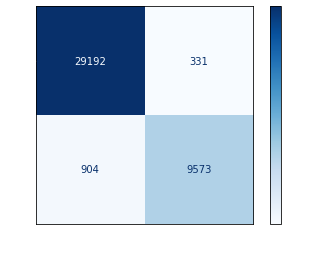

In [18]:
import matplotlib.pyplot as plt

COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plot_confusion_matrix(lgb_clf, X_test, y_test, cmap = 'Blues')
plt.show()

In [19]:
from sklearn.metrics import classification_report

print(classification_report(test_df['label'], test_df['LGB_AI'], labels = ['O', 'X']))

              precision    recall  f1-score   support

           O       0.97      0.99      0.98     29523
           X       0.97      0.91      0.94     10477

    accuracy                           0.97     40000
   macro avg       0.97      0.95      0.96     40000
weighted avg       0.97      0.97      0.97     40000



In [20]:
test_df.columns

Index(['label', 'ips_00013_payload_length_value',
       'ips_00014_payload_logscaled_length_value',
       'ips_00015_payload_sys_manager_flag',
       'ips_00016_payload_sys_console_flag',
       'ips_00017_payload_sys_admin_flag', 'ips_00018_payload_sys_setup_flag',
       'ips_00019_payload_sys_config_flag',
       'ips_00020_payload_sys_server_flag',
       'ips_00021_payload_char_single_quotation_cnt',
       'ips_00022_payload_char_double_quotation_cnt',
       'ips_00023_payload_char_equal_cnt', 'ips_00024_payload_char_plus_cnt',
       'ips_00025_payload_char_star_cnt', 'ips_00026_payload_char_slush_cnt',
       'ips_00027_payload_char_lt_cnt', 'ips_00028_payload_char_at_cnt',
       'ips_00029_payload_char_parent_cnt',
       'ips_00030_payload_char_bracket_cnt',
       'ips_00031_payload_char_dollar_cnt',
       'ips_00032_payload_char_double_dot_cnt',
       'ips_00033_payload_sql_and_flag', 'ips_00034_payload_sql_or_flag',
       'ips_00035_payload_sql_select_flag', 'ips_0

In [21]:
test_df.shape

(40000, 51)

In [28]:
# test_df.to_csv('IPS_payload_lightgbm_result.csv', index = False, sep = ',')